In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [14]:
# 1. Load Dataset
df = pd.read_csv('Sign-Language-Translator/keypoints.csv')

# 2. Separate features and labels
X = df.drop('label', axis=1).values  # all coordinates
y = df['label'].values               # gesture labels

# 3. Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [15]:
# Save label map for prediction use
label_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Map:", label_map)


Label Map: {'1': 0, '10': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'Drink': 14, 'E': 15, 'F': 16, 'G': 17, 'H': 18, 'Hello': 19, 'I': 20, 'I love you': 21, 'K': 22, 'L': 23, 'M': 24, 'N': 25, 'O': 26, 'P': 27, 'Please': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'Thirsty': 33, 'U': 34, 'V': 35, 'W': 36, 'X': 37, 'Y': 38, 'Z': 39}


In [16]:
# 4. Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)


In [18]:
# 6. Build model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 7. Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# 8. Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.1183 - loss: 3.3626 - val_accuracy: 0.4633 - val_loss: 2.0830
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5173 - loss: 1.8729 - val_accuracy: 0.7569 - val_loss: 0.9409
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7244 - loss: 0.9976 - val_accuracy: 0.8991 - val_loss: 0.4552
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8360 - loss: 0.6193 - val_accuracy: 0.9450 - val_loss: 0.2595
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9424 - loss: 0.3226 - val_accuracy: 0.9541 - val_loss: 0.1916
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9021 - loss: 0.3059 - val_accuracy: 0.9587 - val_loss: 0.1359
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9626 - loss: 0.1911 - val_accuracy: 0.9862 - val_loss: 0.0709
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9594 - loss: 0.1427 - val_accuracy: 0.9862 - val_l

In [20]:
# 9. Save model and scaler
model.save('sign_language_model.h5')


In [21]:
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

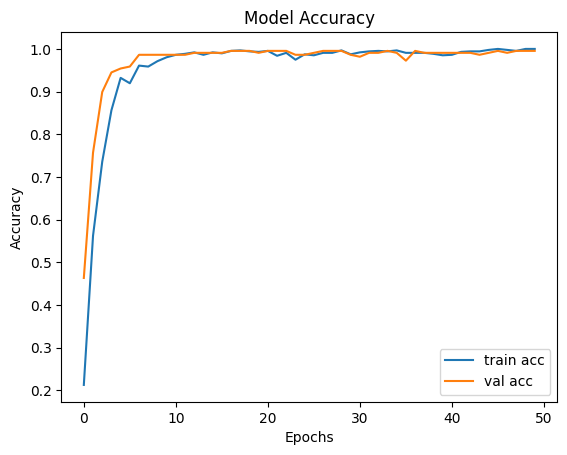

In [22]:
# 10. Optional: Plot accuracy/loss curves
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()